<a href="https://colab.research.google.com/github/MounicaSrinivasan163/HyperParameter_tuning_using_Healthcare_Dataset/blob/main/Hyperparameter_Tuning_Healthcare_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
df = pd.read_csv("/content/healthcare_dataset.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [3]:
df.isna().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [60]:
df.duplicated().sum()

np.int64(534)

In [61]:
df.drop_duplicates(keep='first',inplace=True)

In [62]:
df['Test Results'] = df['Test Results'].replace({
    'Normal': 'Normal',
    'Abnormal': 'Abnormal',
    'Inconclusive': 'Abnormal'
})


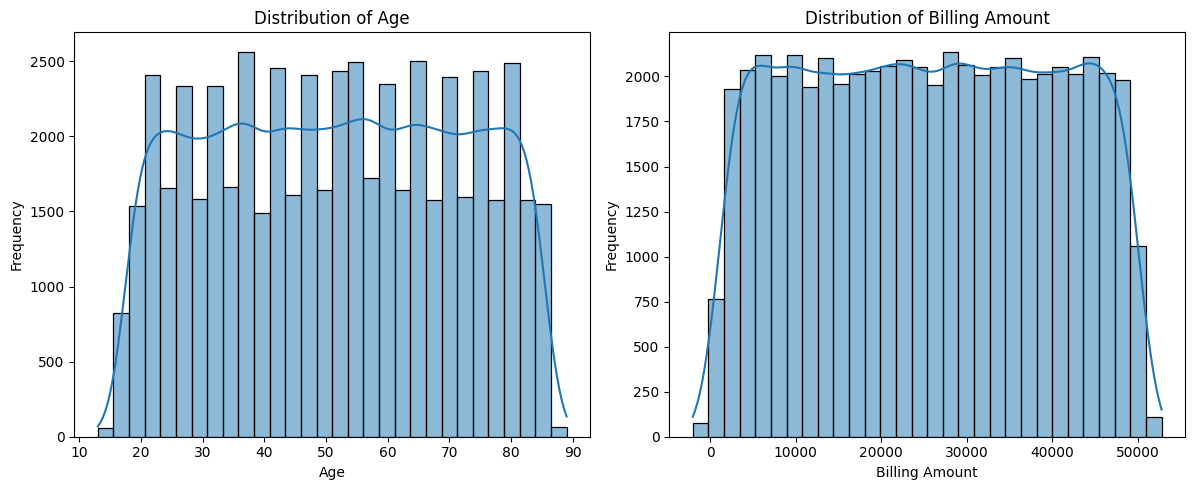

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['Age', 'Billing Amount']

plt.figure(figsize=(18, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

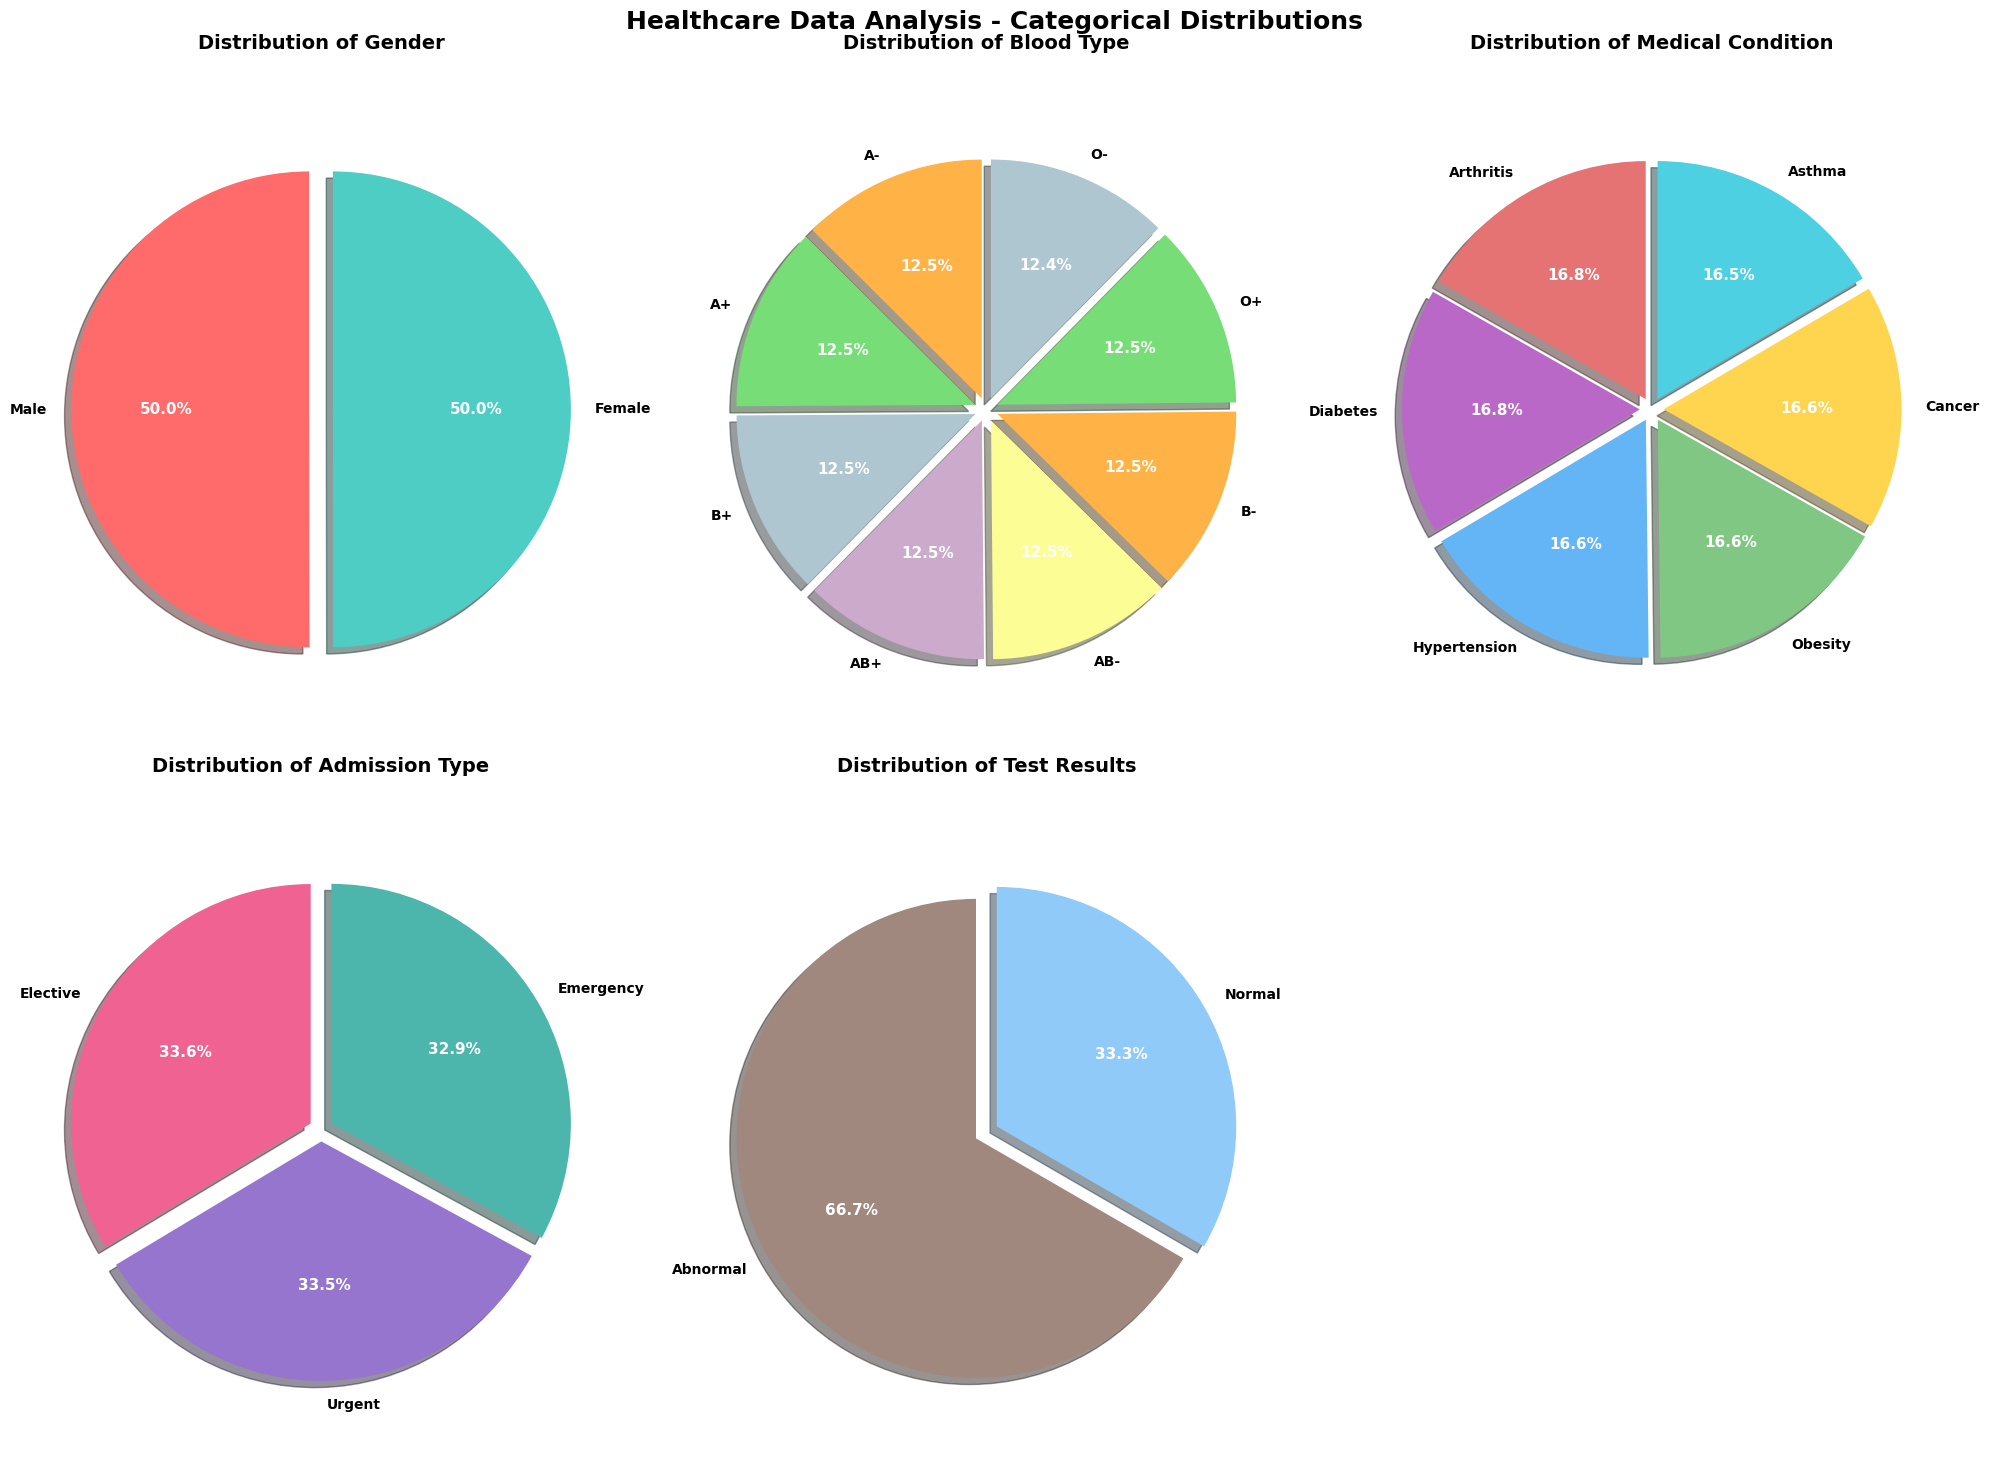

In [64]:
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Test Results']

# Define color palettes for each column (choose visually distinct and matching lengths)
color_palettes = {
    'Gender': ['#FF6B6B', '#4ECDC4'],  # Pink and Turquoise
    'Blood Type': ['#FFB347', '#77DD77', '#AEC6CF', '#CBAACB', '#FDFD96'],  # Pastel shades
    'Medical Condition': ['#E57373', '#BA68C8', '#64B5F6', '#81C784', '#FFD54F', '#4DD0E1'],
    'Admission Type': ['#F06292', '#9575CD', '#4DB6AC', '#7986CB'],  # Purples and teals
    'Test Results': ['#A1887F', '#90CAF9', '#F48FB1', '#80CBC4', '#FFCC80']  # Mixed soft tones
}
#Create figure
plt.figure(figsize=(20, 15))

# Loop through each column and plot pie chart
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    value_counts = df[col].value_counts()

    # Choose color palette based on column
    colors = color_palettes[col][:len(value_counts)]

    # Draw pie chart
    wedges, texts, autotexts = plt.pie(
        value_counts.values,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=[0.05] * len(value_counts),
        shadow=True,
        textprops={'fontsize': 10, 'fontweight': 'bold'}
    )

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(11)

    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold', pad=20)
    plt.axis('equal')

# Adjust layout and title
plt.suptitle('Healthcare Data Analysis - Categorical Distributions', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [65]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'],format='%Y-%m-%d',errors='coerce')
df['Admission_Year'] = df['Date of Admission'].dt.year
df['Admission_Month'] = df['Date of Admission'].dt.month
df['Admission_Day'] = df['Date of Admission'].dt.day

df = df.drop(['Date of Admission'], axis=1)

df['Discharge Date'] = pd.to_datetime(df['Discharge Date'],format='%Y-%m-%d',errors='coerce')
df['Discharge_Year'] = df['Discharge Date'].dt.year
df['Discharge_Month'] = df['Discharge Date'].dt.month
df['Discharge_Day'] = df['Discharge Date'].dt.day

df = df.drop(['Discharge Date'], axis=1)

In [ ]:
### SKEWNESS and KURTOSIS

In [10]:
df['Billing Amount'].skew(),df['Age'].skew()

(np.float64(-0.001304484496984179), np.float64(-0.005677678307097651))

In [11]:
df['Billing Amount'].kurtosis(),df['Age'].kurtosis()

(np.float64(-1.1902541635042452), np.float64(-1.1860819097456052))

In [ ]:
#skewness and kurtosis for continuous columns are in range/limits

In [12]:
for i in df.select_dtypes(include='object').columns:
    print(i)
    print(df[i].nunique())

Name
49992
Gender
2
Blood Type
8
Medical Condition
6
Doctor
40341
Hospital
39876
Insurance Provider
5
Admission Type
3
Medication
5
Test Results
3


In [68]:
# ---- Drop Name column ----
df.drop(columns=['Name','Room Number'], inplace=True)


In [69]:
categorical_features = []
numerical_features = []

for feature in df.columns:
    if df[feature].nunique() < 32:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

In [70]:
categorical_features,numerical_features

(['Gender',
  'Blood Type',
  'Medical Condition',
  'Insurance Provider',
  'Admission Type',
  'Medication',
  'Test Results',
  'Admission_Year',
  'Admission_Month',
  'Admission_Day',
  'Discharge_Year',
  'Discharge_Month',
  'Discharge_Day'],
 ['Age', 'Doctor', 'Hospital', 'Billing Amount'])

In [ ]:
#ENCODING

In [71]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
# ---- One-Hot Encode small nominal columns ----
one_hot_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Medication']
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_df = pd.DataFrame(ohe.fit_transform(df[one_hot_cols]), columns=ohe.get_feature_names_out(one_hot_cols))

# Drop original cols & concat new encoded cols
df.drop(columns=one_hot_cols, inplace=True)
df = pd.concat([df.reset_index(drop=True), ohe_df.reset_index(drop=True)], axis=1)

# ---- Ordinal Encode ordered columns ----
admission_order = [['Emergency', 'Urgent', 'Elective']]
test_order = [['Abnormal', 'Normal']]

oe_admission = OrdinalEncoder(categories=admission_order)
df['Admission Type'] = oe_admission.fit_transform(df[['Admission Type']])

oe_test = OrdinalEncoder(categories=test_order)
df['Test Results'] = oe_test.fit_transform(df[['Test Results']])

# ---- Label Encode high-cardinality columns ----
label_cols = ['Doctor','Hospital']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# ---- Final modified df ----
df

,Age,Doctor,Hospital,Billing Amount,Admission Type,Test Results,Admission_Year,Admission_Month,Admission_Day,Discharge_Year,...,Medical Condition_Hypertension,Medical Condition_Obesity,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,30,26612,29933,18856.281306,1.0,1.0,2024,1,31,2024,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,62,33648,16012,33643.327287,0.0,0.0,2019,8,20,2019,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,76,37828,5473,27955.096079,0.0,1.0,2022,9,22,2022,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,22511,12317,37909.782410,2.0,0.0,2020,11,18,2020,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,43,21259,33598,14238.317814,1.0,0.0,2022,9,19,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,42,20003,15553,2650.714952,2.0,0.0,2020,8,16,2020,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54962,61,37149,31722,31457.797307,2.0,1.0,2020,1,23,2020,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
54963,38,18550,37408,27620.764717,1.0,0.0,2020,7,13,2020,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
54964,43,22665,14329,32451.092358,2.0,0.0,2019,5,25,2019,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


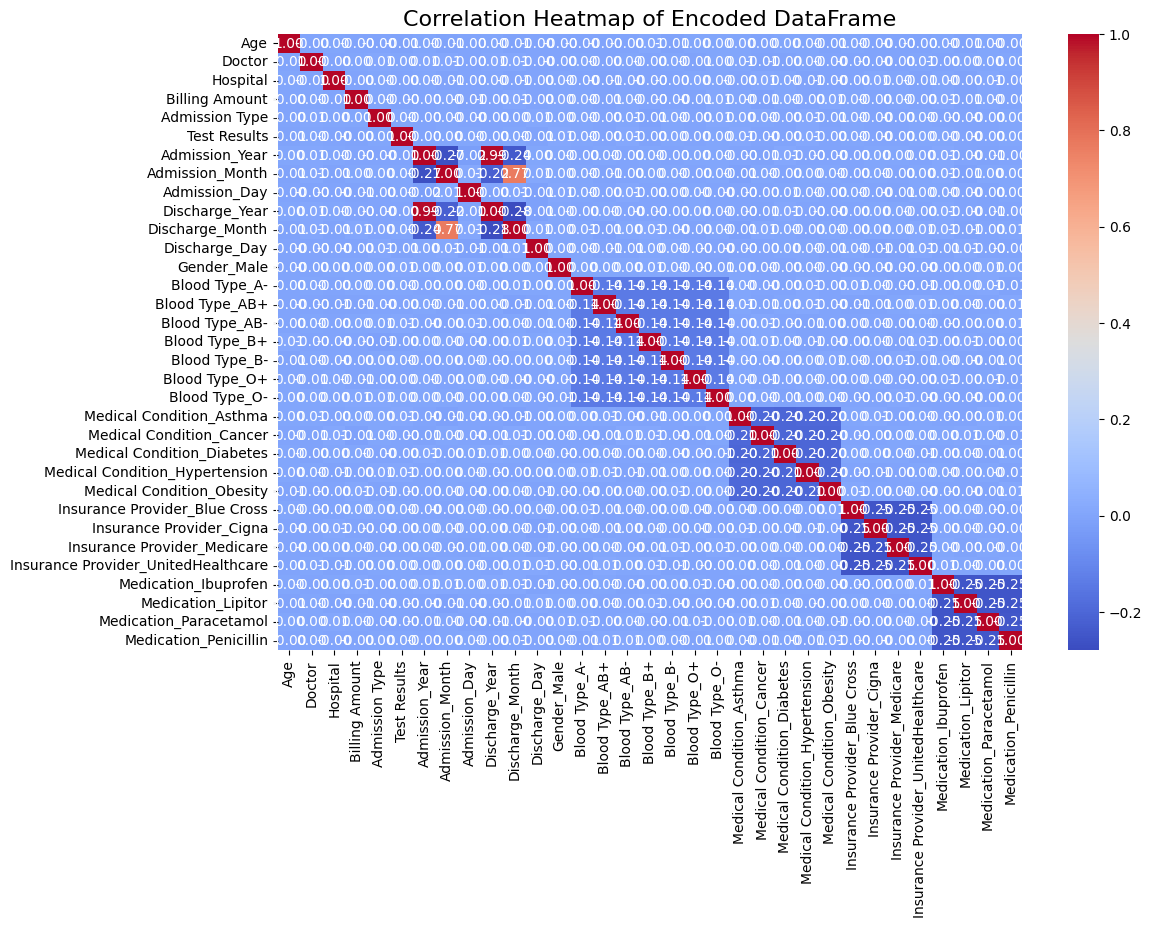

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,        # display correlation values
    fmt=".2f",         # format values to 2 decimal places
    cmap="coolwarm",   # color scheme
    cbar=True
)
plt.title("Correlation Heatmap of Encoded DataFrame", fontsize=16)
plt.show()


In [ ]:
## Train Test Split

In [73]:
x = df.drop('Test Results',axis=1) #Independent Variable
y = df['Test Results'] #Dependent variable

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # increase max_iter if convergence warning occurs

# Fit the model
log_reg.fit(x_train, y_train)

# Predict on test set
y_pred = log_reg.predict(x_test)

# Predict probabilities
y_prob = log_reg.predict_proba(x_test)[:, 1]  # Probability for class 1

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6638166272512279

Confusion Matrix:
 [[7298    0]
 [3696    0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      1.00      0.80      7298
         1.0       0.00      0.00      0.00      3696

    accuracy                           0.66     10994
   macro avg       0.33      0.50      0.40     10994
weighted avg       0.44      0.66      0.53     10994



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [76]:
df1=pd.DataFrame(log_reg.predict_proba(x_test))
df1

,0,1
0,0.664160,0.335840
1,0.659111,0.340889
2,0.680730,0.319270
3,0.693567,0.306433
4,0.653069,0.346931
...,...,...
10989,0.686216,0.313784
10990,0.672951,0.327049
10991,0.668688,0.331312
10992,0.657510,0.342490


In [78]:
y_train.value_counts()

,count
Test Results,
0.0,29337
1.0,14635


In [79]:
#use a statsmodels library library
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Add intercept (statsmodels does not add it automatically)
X_train_sm = sm.add_constant(x_train)
X_test_sm = sm.add_constant(x_test)

# Fit multinomial logistic regression
model = sm.MNLogit(y_train, X_train_sm)
result = model.fit()

# Model summary
print(result.summary())

# Predict probabilities for each class
y_pred_prob = result.predict(X_test_sm)  # DataFrame with one column per class

# Select the class with the highest probability for each row
y_pred_class = y_pred_prob.idxmax(axis=1)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred_class))
print(result.pred_table()) #confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))


Optimization terminated successfully.
         Current function value: 0.635791
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:           Test Results   No. Observations:                43972
Model:                        MNLogit   Df Residuals:                    43939
Method:                           MLE   Df Model:                           32
Date:                Wed, 13 Aug 2025   Pseudo R-squ.:               0.0005818
Time:                        10:07:46   Log-Likelihood:                -27957.
converged:                       True   LL-Null:                       -27973.
Covariance Type:            nonrobust   LLR p-value:                    0.4398
                     Test Results=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.7618     14.209 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
## logistic regression seems to be not the right fit for this data
## Hence went with XGboost

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming x and y are already defined
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# XGBoost multiclass classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  # ✅ for binary classification
    eval_metric='logloss',        # ✅ binary log loss
    learning_rate=0.1,
    max_depth=4,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)



# Train the model
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6529925413862107

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.95      0.78      7298
         1.0       0.40      0.06      0.11      3696

    accuracy                           0.65     10994
   macro avg       0.53      0.51      0.45     10994
weighted avg       0.58      0.65      0.56     10994


Confusion Matrix:
 [[6942  356]
 [3459  237]]


In [ ]:
#Thus compared to Logistic Regression, XGboost showed better accuracy,precision,and recall,f1score.